In [1]:
import glob
import numpy as np
import pandas as pd

In [2]:
subjects = []
courses = []
titles = []
descriptions = []
transcripts = []
for file_path in glob.glob('./yale_dataset/*/*/*overview.txt'):
    path_content = file_path.split('/')
    subjects.append(path_content[2])
    courses.append(path_content[3])
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
        titles.append(lines[0].strip())
        # handle the empty overview (e.g. taking an in-class exam)
        try:
            descriptions.append(lines[1].strip())
        except:
            descriptions.append('')
    
    trans_path = file_path.replace('overview', 'transcript')
    with open(trans_path, 'r') as f:
        lines = f.readlines()
        # there are special cases that the transcript has more than one line
        content = ' '.join(lines)
        transcripts.append(content)
    
    #print(descriptions)
    #break

In [3]:
# to numpy array
np_subjects = np.asarray(subjects)
np_courses = np.asarray(courses)
np_titles = np.asarray(titles)
np_descriptions = np.asarray(descriptions)
np_transcripts = np.asarray(transcripts)

In [4]:
df = pd.DataFrame()
df['subject'] = np_subjects
df['course'] = np_courses
df['title'] = np_titles
df['description'] = np_descriptions
df['transcript'] = np_transcripts

In [5]:
df

,subject,course,title,description,transcript
0,italian-language-and-literature,ital-310,"- Inferno XIX, XXI, XXV, XXVI",This lecture deals primarily with Cantos XIX a...,"Last time we looked at Canto XV of , the canto..."
1,italian-language-and-literature,ital-310,"- Paradise XI, XII",Professor Mazzotta continues his discussion of...,Last time we got into Canto X and I began wit...
2,italian-language-and-literature,ital-310,"- Paradise XV, XVI, XVII",This lecture focuses on the cantos of Cacciagu...,"Last time we looked at the cantos of the sun,..."
3,italian-language-and-literature,ital-310,"- Inferno XII, XIII, XV, XVI",This lecture focuses on the middle zone of Inf...,With Canto XII — from Canto XII to Canto XVI ...
4,italian-language-and-literature,ital-310,- Introduction,Professor Mazzotta introduces students to the ...,"I’m going to give a short class, what is known..."
...,...,...,...,...,...
1053,political-science,plsc-270,- Policy Targets for Capitalist Development,Professor Rae begins by briefly discussing his...,The dog ate my homework; you guys will unders...
1054,political-science,plsc-270,- Counting the Fingers of Adam Smith's Invisib...,Professor Rae introduces Adam Smith’s notion o...,Since we are still in the shopping period and...
1055,political-science,plsc-270,"- Karl Marx, Joseph Schumpeter, and an Economi...",Professor Rae relates Marxist theories of mono...,"Okay, let’s go to work. Violating the syllabu..."
1056,political-science,plsc-270,"- Property, Freedom, and the Essential Job of ...","A practical theory of freedom is discussed, ba...","Okay, today’s discussion relies on three book..."


In [8]:
df.to_csv('Yale_dataset.csv', sep=',', index=False)

In [4]:
df = pd.read_csv('Yale_dataset_abstractive.csv', sep=',')

In [8]:
df['description'].apply(lambda x: len(str(x).split(' '))).max()

275

In [10]:
df['description'].apply(lambda x: len(str(x).split(' '))).min()

1

In [18]:
df['transcript'].apply(lambda x: len(str(x).split(' '))).min()

1

In [9]:
df['description'].str.len().min()

38.0

<AxesSubplot:>

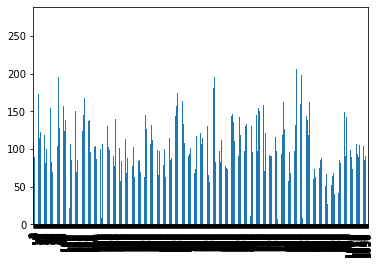

In [12]:
import matplotlib.pyplot as plt
import pandas

fig, ax = plt.subplots()
df['description'].apply(lambda x: len(str(x).split(' '))).plot(ax=ax, kind='bar')

{'whiskers': [<matplotlib.lines.Line2D at 0x1461c5490>,
 'caps': [<matplotlib.lines.Line2D at 0x1461c5af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1461aaf70>],
 'medians': [<matplotlib.lines.Line2D at 0x1461d0250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1461d05e0>],
 'means': []}

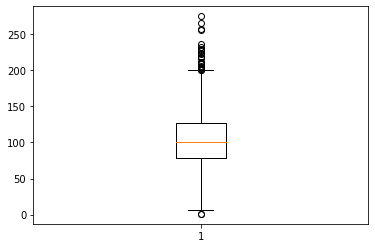

In [15]:
plt.boxplot(df['description'].apply(lambda x: len(str(x).split(' '))))

{'whiskers': [<matplotlib.lines.Line2D at 0x1463fba30>,
 'caps': [<matplotlib.lines.Line2D at 0x14646d190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1463fb6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x14646d8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14646dc40>],
 'means': []}

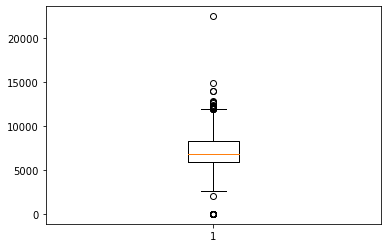

In [22]:
plt.boxplot(df['transcript'].apply(lambda x: len(str(x).split(' '))))

In [19]:
df.sort_values(by="description", key=lambda x: x.str.len())[:50]

,subject,course,title,description,transcript
317,psychology,psyc-110,- Midterm Exam,The midterm was administered in class.,NaN
394,english,engl-291,- Final Exam,The final exam was administered in class.,NaN
367,english,engl-310,- Final Exam,Preparation materials for the final exam.,NaN
813,economics,econ-159,- Final Exam,The final exam was administered in class.,NaN
483,biomedical-engineering,beng-100,- Final Exam,The final exam was administered in class.,NaN
783,economics,econ-252-08,- Final Exam,The final exam was administered in class.,NaN
771,history,hist-119,- Final Exam,The final exam was administered in class.,NaN
850,economics,econ-252-11,- Midterm Exam 1,Midterm Exam 1 covers Lectures 1 through 7.,NaN
125,astronomy,astr-160,- Midterm Exam 1,Midterm Exam 1 covers Lectures 1 through 6.,NaN
840,economics,econ-252-11,- Midterm Exam 2,Midterm Exam 2 covers Lectures 8 through 15.,NaN
